#### Татур А.А.
#### ДЗ 24 - Распознавание лиц
#### Дата - 21.01.2022
#### Версия - 0.1
#### Задачи
#### 1. Распознать лица на фото
#### 2. Подписать людей на фото

#### 0. Импорт библиотек

In [2]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
import os

#### 1. Реализовать загрузку изображений с лицами.

In [3]:
known_face_encodings = [] #Массив с энкодингами известных лиц
known_face_names = []     #Массив с именами людей

for x in os.listdir ('images'):
    link = 'images\\' + x
    image = face_recognition.load_image_file(link)
    
    encoding = face_recognition.face_encodings(image)[0]
    known_face_encodings.append (encoding)
    
    known_face_names.append (x[:-4])

#### 2. Распознавание лиц на статичных изображениях

In [25]:
face_locations = [] #расположение обнаруженных лиц
face_encodings = [] #энкодинги обнаруженных лиц
face_names = [] #список имен, обнаруженных лиц

In [26]:
new_img = face_recognition.load_image_file("friends.jpg") #Загружаем изображение
#new_img = cv2.resize(new_img, (0, 0), fx=0.25, fy=0.25)#[:, :, ::-1] # Этот рескейл нужен, если брать изображение с камеры, чтобы ускорить процесс
face_locations = face_recognition.face_locations(new_img)
face_encodings = face_recognition.face_encodings(new_img, face_locations)

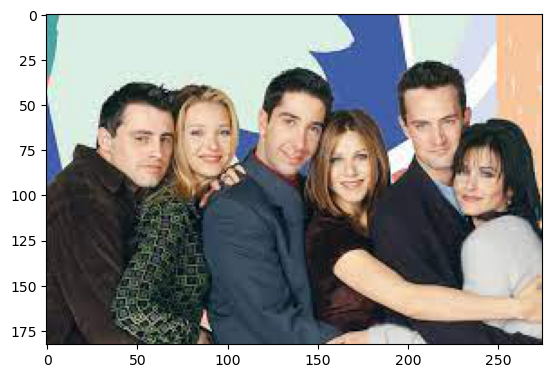

In [27]:
plt.imshow(new_img);

In [28]:
#cv2.imshow('img', new_img[:,:,::-1])
#cv2.waitKey(0)
#cv2.destroyAllWindows()

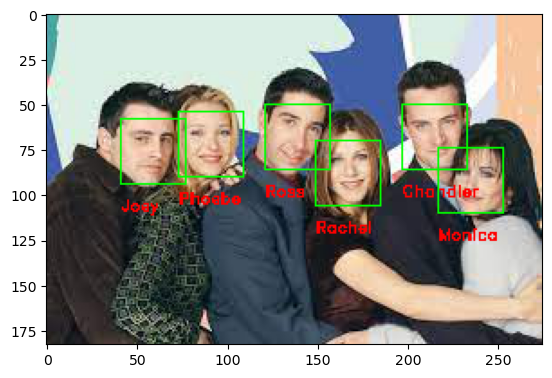

In [29]:
for face_encoding in face_encodings: #Перебираем все обнаруженные лица на картинке.
    
    # Ищем совпадение лиц на фото и известных лиц
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    
    # даем значение переменной "name" по дефолту "Unknown"
    name = "Unknown"
    
    #Позиция мэтча
    match_index=np.argmax(matches)
    
    #Добавим имя в список. Если под указанным индексом False значение, то добавится Unknown
    if matches[match_index]:
        name = known_face_names[match_index]
    
    face_names.append(name)

copy = new_img.copy() # Создаем копию изображения, чтобы рисовать на ней.

for (top, right, bottom, left), name in zip(face_locations, face_names):
    
    # Рисуем прямоугольник вокруг лица
    cv2.rectangle(copy, (left, top), (right, bottom), (0, 255, 0), 1)

    # Подписываем человека
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(copy, name, (left, bottom +15), font, 0.3, (255, 0, 0), 1)

plt.imshow (copy);

#### Выводы:
Библиотека face_recognition построена на базе dlib и позволяет быстро и высокой точностью (по некоторым данным до 98.7) определить и распознать лицо человека на фото. 